 ## Statistics_Wilcox.test
 
    최초 작성일 : 2020/03/05
    작성자 : 조예슬 
 
    < 작성 내용 >
    
        - Wilcoxen test

    두 그룹의 평균 비교

- T-test(=student T-test, Independent T-test) : 모수적 방식


- Mann-Whitney U Test(=Wilcoxen rank-sum test, Mann-Whitney-Wilcoxen test(MWW)) : 비모수적 방식


- Welch's T-Test


    < T-test 사용 조건 >
    
    : 결과값이 연속변수 여부
        연속변수이면, T-test
        연속변수 아니면, Mann-Whitney U Test
    
    : 정규 분포 여부
        정규분포이면, T-test
        정규분포 아니면, Mann-Whitney U test
        
    : 등분산 여부
        등분산이면, T-test
        등분산 아니면, Welch's T-test

## Wilcoxon test

    - R에서는 wilcox.test()함수를 동일하게 사용하고, 
    
      옵션에서 "paired = TRUE" 여부에 따라서 짝을 이룬 표본 여부를 구분함
      
      : Wilcoxon rank sum test(Mann-Whitney U-test) : 두 집단이 독립적인 경우
      
      : Wilcoxon signed rank test : 짝을 이룬 집단인 경우 / paired=TRUE
      
### Wilcoxon rank sum test(Mann-Whitney U-test)

    정규분포를 따르지 않는 두 모집단에 대한 비모수 검정에 사용
    
    ex) USA와 nonUSA간의 car price 비교하기
    
    귀무가설 : p-value값 0.05보다 클 경우
             : 두 집단간에 차이 없다
    대립가설 : p-value값 0.05보다 작을 경우
             : 두 집단간에 차이 있다    
    
    - 방법
    
    : wilcox.test(y ~ Factor, data=dataframe, alternative=c("two.sided", "less", "greater"), conf.int=FALSE, conf.level=0.95)
    
    : wilcox.test(x, y, alternative=c("two.sided", "less", "greater"), conf.int=FALSE, conf.level=0.95)
    
### Wilcoxon signed rank test

    ex) 10명의 당뇨병 환자를 선별하여 1달 동안 '위약(placebo)(sample1)'을 투여한 기간의 혈압과 '신약(new medicine)(sample2)'을 투여한 1달 기간 동안의 혈당 수치를 측정하여 짝을 이루어 혈당 차이를 유의수준 5%에서 비교하는 방법 (모집단 정규분포 따르지 않을 경우)
    
    귀무가설 : 당뇨병 치료제 효과 없다(mu1 = mu2, difference = 0)
    대립가설 : 당뇨병 치료제 효과 있다(혈당 낮춘다 mu1 > mu2, 우측검정(right-sidedtest))
    
    당뇨병 치료제 효과가 있어서 혈당을 낮추었는지를 검정하는 것이므로
    alternative = c("greater"), 옵션(mu1 > mu2)
    
    - 방법
    : wilcox.test(x1, x2, alternative=c("greater"), paired=TRUE, conf.level=0.95)

< 출처 >

https://rfriend.tistory.com/130

## Wilcoxon rank sum test

정규분포는 아니나, 연속변수일 경우

### 예시1. 환자 진찰결과

In [6]:
# library(moonBook)

Warning message:
"package 'moonBook' was built under R version 3.6.2"

In [7]:
# 데이터 알아보기
# 경기도에 소재한 한 대학병원에서 2년동안 내원한 관상동맥증후군 환자(Dx : 진찰결과)

str(acs) # 17개의 변수가 있는 857개의 관측 데이터
head(acs)

'data.frame':	857 obs. of  17 variables:
 $ age             : int  62 78 76 89 56 73 58 62 59 71 ...
 $ sex             : chr  "Male" "Female" "Female" "Female" ...
 $ cardiogenicShock: chr  "No" "No" "Yes" "No" ...
 $ entry           : chr  "Femoral" "Femoral" "Femoral" "Femoral" ...
 $ Dx              : chr  "STEMI" "STEMI" "STEMI" "STEMI" ...
 $ EF              : num  18 18.4 20 21.8 21.8 22 24.7 26.6 28.5 31.1 ...
 $ height          : num  168 148 NA 165 162 153 167 160 152 168 ...
 $ weight          : num  72 48 NA 50 64 59 78 50 67 60 ...
 $ BMI             : num  25.5 21.9 NA 18.4 24.4 ...
 $ obesity         : chr  "Yes" "No" "No" "No" ...
 $ TC              : num  215 NA NA 121 195 184 161 136 239 169 ...
 $ LDLC            : int  154 NA NA 73 151 112 91 88 161 88 ...
 $ HDLC            : int  35 NA NA 20 36 38 34 33 34 54 ...
 $ TG              : int  155 166 NA 89 63 137 196 30 118 141 ...
 $ DM              : chr  "Yes" "No" "No" "No" ...
 $ HBP             : chr  "No" "Yes"

age,sex,cardiogenicShock,entry,Dx,EF,height,weight,BMI,obesity,TC,LDLC,HDLC,TG,DM,HBP,smoking
62,Male,No,Femoral,STEMI,18.0,168,72,25.51020,Yes,215,154,35,155,Yes,No,Smoker
78,Female,No,Femoral,STEMI,18.4,148,48,21.91381,No,NA,NA,NA,166,No,Yes,Never
76,Female,Yes,Femoral,STEMI,20.0,NA,NA,NA,No,NA,NA,NA,NA,No,Yes,Never
89,Female,No,Femoral,STEMI,21.8,165,50,18.36547,No,121,73,20,89,No,No,Never
56,Male,No,Radial,NSTEMI,21.8,162,64,24.38653,No,195,151,36,63,Yes,Yes,Smoker
73,Female,No,Radial,Unstable Angina,22.0,153,59,25.20398,Yes,184,112,38,137,Yes,Yes,Never


In [8]:
# 성별에 따른 평균 나이

mean_M <- mean(acs$age[acs$sex == "Male"])
mean_F <- mean(acs$age[acs$sex == "Female"])
cat(mean_M, "/", mean_F)

60.61053 / 68.67596

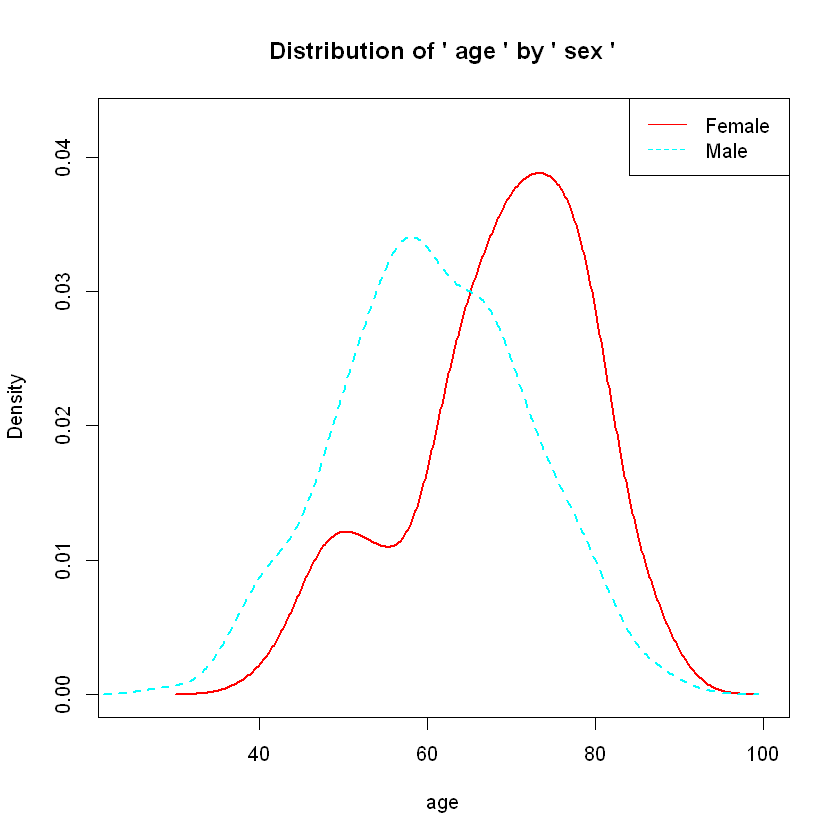

In [9]:
# 두 집단 그래프 그려보면서 정규분포 여부 확인해보기

moonBook::densityplot(age ~ sex, data=acs)
# age : 결과변수, 종속변수 / sex : 원인변수, 독립변수
# 그래프를 통해서는 둘다 정규분포가 아닌것 같다..
# 그러니 shapiro test를 통해 정확하게 확인해보기!!

In [12]:
# 정규분포 테스트 (Shapiro test) : 통계의 검정 방법들은 정규분포라고 가정한 후에 진행되므로!!
## 귀무가설 : 정규분포가 맞다
## 대립가설 : 정규분포가 아니다

shapiro.test(acs$age[acs$sex == "Male"])
# p-value = 0.2098
# 0.05보다 큰 값을 가지므로, 귀무가설 성립

shapiro.test(acs$age[acs$sex == "Female"])
# p-value = 6.34e-07
# 0.05보다 작은 값을 가지므로, 대립가설 성립

# 그래프 상으로는 두 집단 다 정규분포가 아닐것이라 생각했지만
# shapiro test를 통해서 Male 집단은 정규분포가 성립함을 확일 할 수 있었음


	Shapiro-Wilk normality test

data:  acs$age[acs$sex == "Male"]
W = 0.99631, p-value = 0.2098



	Shapiro-Wilk normality test

data:  acs$age[acs$sex == "Female"]
W = 0.96138, p-value = 6.34e-07


In [13]:
# 등분산 테스트 : t-test 사용 전에 등분산인지 아닌지 먼저 확인해보기
# 귀무가설 : 등분산이 맞다
# 대립가설 : 등분산이 아니다 

var.test(age ~ sex, data=acs)
# p-value = 0.3866
# p-value값이 0.05보다 크므로 귀무가설 성립
# 등분산이다


	F test to compare two variances

data:  age by sex
F = 0.91353, num df = 286, denom df = 569, p-value = 0.3866
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7495537 1.1209741
sample estimates:
ratio of variances 
         0.9135342 


#### 정규분포 테스트 시에 
#### Male은 귀무가설을 성립하였지만, Female은 귀무가설을 기각하였다
#### 주어진 데이터는 t-test 사용 불가
#### 따라서 wilcox 사용

In [14]:
# wilcox
## 귀무가설 : 남성과 여성의 평균나이 차이가 없다
## 대립가설 : 남성과 여성의 평균나이 차이가 있다
wilcox.test(age ~ sex, data=acs)

# p-value < 2.2e-16
# 0.05보다 작음 
# 대립가설 성립 / 남성과 여성의 평균나이 차이가 있다


	Wilcoxon rank sum test with continuity correction

data:  age by sex
W = 115271, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


### 예시2. 각 도시별 출생률

In [16]:
# 각도시별 출생률 나타내는 데이터 파일 

mydata <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/rwork/StatProject/data/independent.csv")
str(mydata) # 3개의 변수에 20개의 데이터
head(mydata)

# dummy라는 컬럼은 0은 군을 나타내고 1은 시를 나타내는 컬럼이다
# 시와 군에 따라 합계 출산율의 차이가 있는지 없는지를 보려고 한다
# 귀무 가설 : 차이가 없다
# 대립 가설 : 차이가 있다 

# 시, 군 별로 평균알기
gun.mean <- mean(mydata$birth_rate[mydata$dummy==0])
si.mean <- mean(mydata$birth_rate[mydata$dummy==1])
cat(gun.mean, "/",  si.mean)
# 평균만 보고서는 차이 유무 나타내기 어려움

'data.frame':	157 obs. of  3 variables:
 $ cities    : Factor w/ 157 levels "강원 강릉시",..: 31 30 43 35 29 22 46 28 33 20 ...
 $ birth_rate: num  1.29 1.16 1.1 1.18 1.07 ...
 $ dummy     : int  1 1 1 1 1 1 1 1 1 1 ...


cities,birth_rate,dummy
경기 수원시,1.292,1
경기 성남시,1.159,1
경기 의정부시,1.104,1
경기 안양시,1.177,1
경기 부천시,1.072,1
경기 광명시,1.235,1


1.472159 / 1.37812

In [18]:
# 정규분포 테스트

shapiro.test(mydata$birth_rate[mydata$dummy==0])
# p-value = 0.009702
# 0.05보다 크므로 정규분포O

shapiro.test(mydata$birth_rate[mydata$dummy==1])
# p-value = 0.001476 
# 0.05보다 작으므로 정규분포X

# 하나라도 정규분포가 아니라면 wilcox 사용하자


	Shapiro-Wilk normality test

data:  mydata$birth_rate[mydata$dummy == 0]
W = 0.95857, p-value = 0.009702



	Shapiro-Wilk normality test

data:  mydata$birth_rate[mydata$dummy == 1]
W = 0.94006, p-value = 0.001476


In [19]:
# Wilcox 

wilcox.test(mydata$birth_rate ~ mydata$dummy, data=mydata) 
# p-value = 0.04152
# 0.05보다 작다 대립가설 성립


	Wilcoxon rank sum test with continuity correction

data:  mydata$birth_rate by mydata$dummy
W = 3655.5, p-value = 0.04152
alternative hypothesis: true location shift is not equal to 0


## Wilcoxen signed rank test

연속변수가 아니거나 정규분포가 아닐 경우

### 예시1. sleep

In [32]:
# 같은 집단에서
str(sleep)
head(sleep)

'data.frame':	20 obs. of  3 variables:
 $ extra: num  0.7 -1.6 -0.2 -1.2 -0.1 3.4 3.7 0.8 0 2 ...
 $ group: Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ ID   : Factor w/ 10 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...


extra,group,ID
0.7,1,1
-1.6,1,2
-0.2,1,3
-1.2,1,4
-0.1,1,5
3.4,1,6


In [34]:
# 특정변수만 뽑아내기
before <- subset(sleep, group==1, extra)
before

after <- subset(sleep, group==2, extra)
after

extra
0.7
-1.6
-0.2
-1.2
-0.1
3.4
3.7
0.8
0.0
2.0


,extra
11,1.9
12,0.8
13,1.1
14,0.1
15,-0.1
16,4.4
17,5.5
18,1.6
19,4.6
20,3.4


In [35]:
# 한쌍의 데이터를 전문적으로 처리하는 패키지
# install.packages("PairedData")
library(PairedData)

Warning message:
"package 'PairedData' was built under R version 3.6.3"Loading required package: MASS
Loading required package: gld
Warning message:
"package 'gld' was built under R version 3.6.2"Loading required package: mvtnorm
Loading required package: lattice

Attaching package: 'lattice'

The following object is masked from 'package:moonBook':

    densityplot

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"
Attaching package: 'PairedData'

The following object is masked from 'package:base':

    summary



In [38]:
# 합치기
sleep2 <- paired(before, after)
sleep2

before,after
0.7,1.9
-1.6,0.8
-0.2,1.1
-1.2,0.1
-0.1,-0.1
3.4,4.4
3.7,5.5
0.8,1.6
0.0,4.6
2.0,3.4


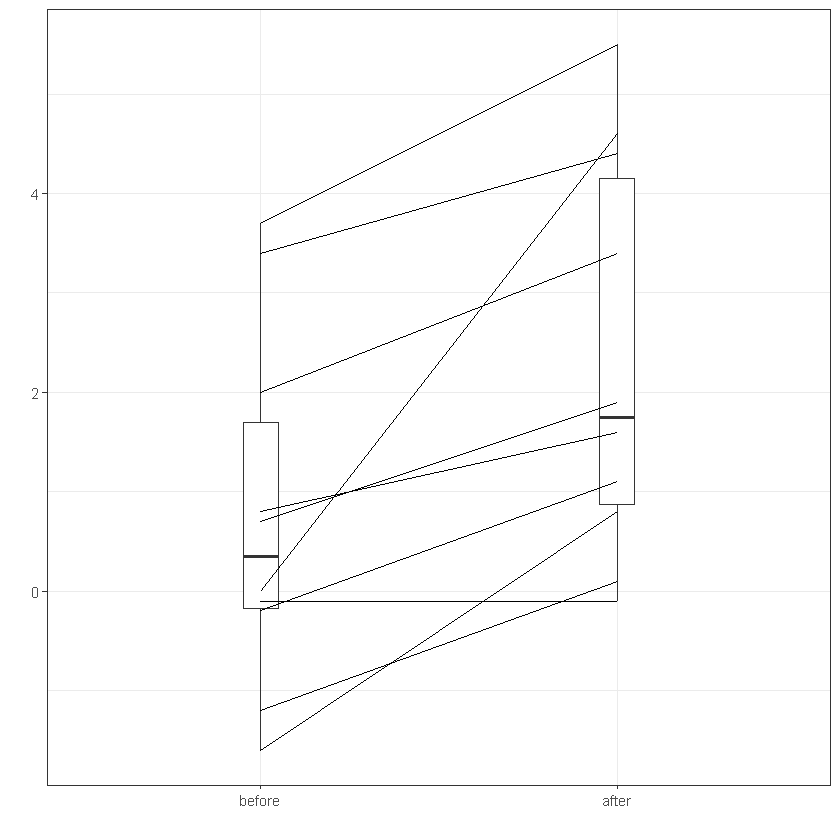

In [40]:
# 그래프 그리기

plot(sleep2, type="profile") + theme_bw()

# 진심 이거 뭔그래프야..
# 해석 어떻게 하는거..

In [41]:
# 정규분포 

shapiro.test(sleep$extra[sleep$group==1]) # p-value = 0.4079
shapiro.test(sleep$extra[sleep$group==2]) # p-value = 0.3511
# with(sleep, shapiro.test(extra[group==1]) # with 쓰면 sleep$ 안붙여줘도됨
# 0.05보다 크므로 정규분포O


	Shapiro-Wilk normality test

data:  sleep$extra[sleep$group == 1]
W = 0.92581, p-value = 0.4079



	Shapiro-Wilk normality test

data:  sleep$extra[sleep$group == 2]
W = 0.9193, p-value = 0.3511


In [43]:
# 등분산

var.test(sleep$extra[sleep$group==1], sleep$extra[sleep$group==2])
# 0.7427 / 0.05보다 크므로 등분산O


	F test to compare two variances

data:  sleep$extra[sleep$group == 1] and sleep$extra[sleep$group == 2]
F = 0.79834, num df = 9, denom df = 9, p-value = 0.7427
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.198297 3.214123
sample estimates:
ratio of variances 
         0.7983426 


In [46]:
# t.test
t.test(sleep$extra ~ sleep$group, data=sleep, paired = T)

# 0.05보다 작음 / 대립가설 채택 / 전후 다르다


	Paired t-test

data:  sleep$extra by sleep$group
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


In [47]:
# 만약 정규분포가 아니라면!!!!!

with(sleep, wilcox.test(extra[group==2]-extra[group==1], exact=F))
# 두 집단의 차이 비교
# p-value = 0.009091 / 0.05보다 작아 대립가설 채택 / 차이가 있음
# exact=F : 경고메시지 안뜨게하기 
#         : 정규분포로할지말지에 대한 경고메시지가 뜬거...?  
#         : 원래값은 정규분포 값이여서 경고메시지 뜬다...


	Wilcoxon signed rank test with continuity correction

data:  extra[group == 2] - extra[group == 1]
V = 45, p-value = 0.009091
alternative hypothesis: true location is not equal to 0
